In [163]:
import json
import subprocess
from random import shuffle

import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from dj_config.settings import BASE_DIR

In [164]:
labels = {
    "easy_11": "54648529412356965264743587694",
    "easy_12": "79238749148638925714957438286",
    "easy_13": "438769177513147396384293685453",
    "easy_14": "763589321398627816627846451",
    "easy_21": "58144143723786128639274862948513",
    "easy_22": "9863547594266187529584764297",
    "easy_23": "56742298346234267589362436948324",
    "easy_24": "57675321447589438167435764295",
    "easy_31": "8915796278291437314859385823",
    "easy_32": "13646782955136944853599862417",
    "easy_33": "3286421536187495132994145726",
    "easy_34": "721215898685362796143414893562",
    "easy_41": "26834528482456978313578378137326",
    "easy_42": "93248757393465361587264896352",
    "easy_43": "3679627349488531125461567174",
    "easy_44": "621459392362148176988624315",
    "easy_51": "9237864174385324462152861875",
    "easy_52": "9545384151232365786852139916",
    "easy_53": "625919425586319758494817648218744516",
    "easy_54": "19543187647892324113681821476648",
    "easy_61": "6278163542834129523946539589",
    "easy_62": "6985479532628583915862364185",
    "easy_63": "35487691812634855796325873549583",
    "easy_64": "615791442972354715548965317659456",
    "easy_71": "34154626712758274465467392598",
    "easy_72": "35489719815727234516882116745",
    "easy_73": "3826989532431762381471639328",
    "easy_74": "9654178369571485136245383",
    "easy_81": "19242136542581463956174172738967",
    "easy_82": "931567833495698438192517613645843",
    "easy_83": "27153849367256154617337127891832",
    "easy_84": "32498732658361587221391913728725",
    "easy_91": "31644361558718694248879124937184",
    "easy_92": "512441599438686527436754838246",
    "easy_93": "19759263859272763544816839568",
    "easy_94": "24785632458127748553689716896142",
    "easy_101": "985276297421329613498897332759314",
    "easy_102": "593867991625414427958616439273419213",
    "easy_103": "24965916739835769878512364978",
    "easy_104": "543641523485967694387963261",
    "easy_111": "7364832453772486345915374831595962385",
    "easy_112": "681946738572721415943951645",
    "easy_113": "14827168972937651976421268149583",
    "easy_114": "39681756189474983427435619632259",
    "easy_121": "342153683227658613139266251862347",
    "easy_122": "54173127853785437951486574295382",
    "easy_123": "69937714961489826476956945751672",
    "easy_124": "786229581639545131276384678139",
    "easy_131": "67529186537485291381748863917418",
    "easy_132": "15387312483625278118349631697893",
    "easy_133": "21474197433168795167837645621649",
    "easy_134": "8517236513452142671843829151",
    "easy_141": "468598317873586629395473367485872",
    "easy_142": "2839596716584172627533678584",
    "easy_143": "69543167713838192795538943915743",
    "easy_144": "75368465317934921897798425133415",
    "easy_151": "51682919536417389916298121873",
    "easy_152": "923774139898219436149588967146789",
    "easy_153": "812375862318925474534379861",
    "easy_154": "6762873981469183525341798214",
    "easy_161": "471658764135289865351278951915734",
    "easy_162": "297858369492564618328453766514",
    "easy_163": "38467693827668917357145658195284",
    "easy_164": "54714265775135924176212234858354",
    "easy_171": "145318944213629246169345156482958",
    "easy_172": "4231169861437873163212946",
    "easy_173": "132859641829382319775349215486",
    "easy_174": "231624866968952425193471686897421739",
    "easy_181": "9749148297162163384292656217",
    "easy_182": "81235496934528158213727961",
    "easy_183": "92529684143691367229462342381792",
    "easy_184": "573863592484735792681514726425373694",
    "easy_191": "983458839418246968691571854243756",
    "easy_192": "83489552862384956158743357296",
    "easy_193": "13547384739528467817325248562396",
    "easy_194": "9425782311976786352371643178",
    "easy_201": "7483176144873954293368263231",
    "easy_202": "43928957429624873162814523931",
    "easy_203": "61725324251398272413578635975634",
    "easy_204": "45214295182155943678918345717391",
    "easy_211": "5244356382578218957263572396",
    "easy_212": "82431953375428513723416927389652",
    "easy_213": "36515672834691735136254968925184",
    "easy_214": "83412521891286571793512328467341",
    "easy_221": "94537965393641817529377243952",
    "easy_222": "541987491657232959652251873",
    "easy_223": "8459371324258412381759692187",
    "easy_224": "196876961842415594821342791345692",
    "easy_231": "2944765913872524388246536792867",
    "easy_232": "71523864197695413635231978665",
    "easy_233": "713651351924174798268237548897842",
    "easy_234": "584667942673429187427632189673",
    "easy_241": "286135876283761498923847132376148",
    "easy_242": "68131642756475192691817935644981",
    "easy_243": "28592156825391657284835821549796",
    "easy_244": "451997853394375854297689569718456841",
    "easy_251": "46174325895217746997151658931697",
    "easy_252": "68142325489426658953212981795231",
    "easy_253": "39572724987613552628793765253974",
    "easy_254": "59864147971865323585473286",
}

In [165]:
"""load x_test_combo data"""

saved_x_test = "x_test_2024_02_09_10_18"
x_test_path = f"{BASE_DIR}/data_sources/ml_data/{saved_x_test}.json"

with open(x_test_path, "r") as report_file:
    x_test_data = json.load(report_file)

x_test = np.array(x_test_data)
x_test.shape

(20917, 28, 28)

In [166]:
"""Loading the model """

saved_model = "trained_mnist_2024_02_09_10_18"
model_save_path = f"{BASE_DIR}/data_sources/ml_data/{saved_model}.keras"

model = keras.models.load_model(model_save_path)

In [167]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

654/654 [==============================] - 0s 477us/step


In [168]:
data_set = []

In [169]:
"""Load board data"""

difficulty = ["easy"]

for diff in difficulty:
    for page in range(1, 26):
        for pos in range(1, 5):

            board_name = f"{diff}_{page}{pos}"

            board_data_path = (
                f"{BASE_DIR}/data_sources/board_data/{diff}/{board_name}.json"
            )

            with open(board_data_path, "r") as report_file:
                _board_data = json.load(report_file)

            board_data: np.ndarray = np.array(_board_data)
            board_labels = [int(i) for i in labels.get(board_name, [])]
            len_board_labels = len(board_labels)
            board_numbers: list[np.ndarray] = []

            count = 0
            for number_data in board_data:
                if np.count_nonzero(number_data) == 0:
                    continue

                board_numbers.append(number_data)

                img_to_predict = np.expand_dims(number_data, axis=0)
                predictions_single = probability_model.predict(img_to_predict)
                prediction_number = np.argmax(predictions_single[0])

                label = board_labels[count]
                if label != prediction_number:
                    plt.imshow(number_data, cmap=plt.cm.binary)
                    plt.plot()
                    raise Exception(
                        f"label != prediction;"
                        f" {board_name = }, {label = }, {prediction_number = }, {count = }"
                    )
                count += 1

            len_board_numbers = len(board_numbers)
            if len_board_labels != len_board_numbers:
                raise Exception(
                    f"Wrong data len;"
                    f" {board_name = }, {len_board_labels = }, {len_board_numbers = }"
                )

            for x, y in zip(board_numbers, board_labels):
                data_set.append([x.tolist(), y])

1/1 [==============================] - 0s 11ms/step


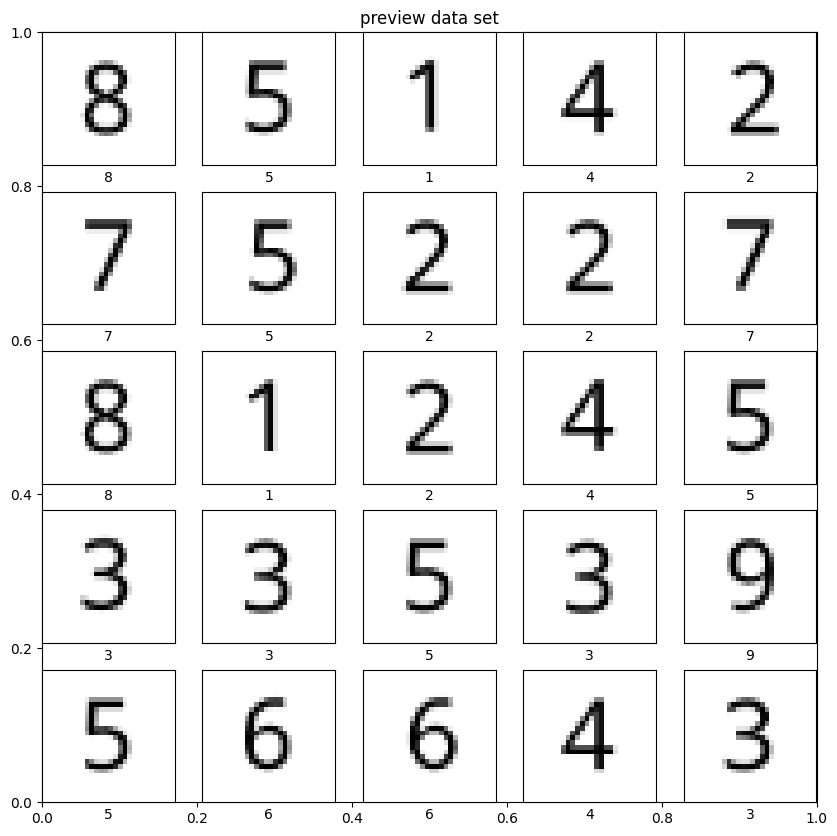

In [170]:
preview_data_set = data_set[:]
shuffle(preview_data_set)

plt.figure(figsize=(10, 10))
plt.title("preview data set")
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(preview_data_set[i][0], cmap=plt.cm.binary)
    plt.xlabel(preview_data_set[i][1])
plt.show()

In [171]:
x_train, y_train = [], []
for i in data_set:
    x_train.append(i[0])
    y_train.append(i[1])

print(f"{np.array(x_train).shape = }")
print(f"{np.array(y_train).shape = }")

np.array(x_train).shape = (3056, 28, 28)
np.array(y_train).shape = (3056,)


In [172]:
"""Save my data set"""

data_set_path = f"{BASE_DIR}/data_sources/ml_data/my_data_set.json"

with open(data_set_path, "w") as report_file:
    json.dump(
        obj=data_set,
        fp=report_file,
        ensure_ascii=False,
    )

In [174]:
command_str = f"xz -k {data_set_path}"
"""-ktl -> compress with no delete + test + list info"""

subprocess.run(
    command_str.split(" "),
    capture_output=True,
    check=True,
    encoding="utf-8",
)

CompletedProcess(args=['xz', '-k', '/home/valikq/PycharmProjects/SudokuML/data_sources/ml_data/my_data_set.json'], returncode=0, stdout='', stderr='')